<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_AI/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Mount Google Drive, load the dataframe from the file "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet", and plot monthly exports and imports for both USA and China in two separate plots for the entire duration.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/ai4trade/trade_data_30_partners.parquet')

display(df.head())

,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098


## Filter data

### Subtask:
Filter the DataFrame to include only data for 'USA' and 'CHN' (China).


**Reasoning**:
Filter the DataFrame to include only rows where the 'origin' column is 'USA' or 'CHN' and overwrite the original DataFrame.



In [3]:
df = df[df['origin'].isin(['USA', 'CHN'])]
df.head()

,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098


## Convert 'month' column to datetime

### Subtask:
Ensure the 'month' column is in datetime format for proper time-series plotting.


**Reasoning**:
Convert the 'month' column to datetime format using pd.to_datetime().



In [4]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16601270 entries, 0 to 16601269
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   origin       string        
 1   destination  string        
 2   hs6          string        
 3   hs4          string        
 4   trade_flow   string        
 5   month        datetime64[ns]
 6   value        int64         
dtypes: datetime64[ns](1), int64(1), string(5)
memory usage: 886.6 MB


## Aggregate data

### Subtask:
Group the data by month, origin, and trade flow, and sum the 'value' for each group.


**Reasoning**:
Group the data by month, origin, and trade flow, sum the 'value', and reset the index as requested in the instructions.



In [5]:
df_agg = df.groupby(['month', 'origin', 'trade_flow'])['value'].sum().reset_index()
display(df_agg.head())

,month,origin,trade_flow,value
0,2023-01-01,CHN,Exports,239500372537
1,2023-01-01,CHN,Imports,164236653834
2,2023-01-01,USA,Exports,144666835558
3,2023-01-01,USA,Imports,228866956842
4,2023-02-01,CHN,Exports,181153592637


## Separate data for plotting

### Subtask:
Create separate DataFrames or series for USA exports, USA imports, China exports, and China imports.


**Reasoning**:
Filter the aggregated DataFrame to create separate DataFrames for USA exports, USA imports, China exports, and China imports.



In [6]:
usa_exports = df_agg[(df_agg['origin'] == 'USA') & (df_agg['trade_flow'] == 'Exports')]
usa_imports = df_agg[(df_agg['origin'] == 'USA') & (df_agg['trade_flow'] == 'Imports')]
chn_exports = df_agg[(df_agg['origin'] == 'CHN') & (df_agg['trade_flow'] == 'Exports')]
chn_imports = df_agg[(df_agg['origin'] == 'CHN') & (df_agg['trade_flow'] == 'Imports')]

display(usa_exports.head())
display(usa_imports.head())
display(chn_exports.head())
display(chn_imports.head())

,month,origin,trade_flow,value
2,2023-01-01,USA,Exports,144666835558
6,2023-02-01,USA,Exports,140088472528
10,2023-03-01,USA,Exports,161416479194
14,2023-04-01,USA,Exports,142556815107
18,2023-05-01,USA,Exports,145873500166


,month,origin,trade_flow,value
3,2023-01-01,USA,Imports,228866956842
7,2023-02-01,USA,Imports,208034702493
11,2023-03-01,USA,Imports,236503691514
15,2023-04-01,USA,Imports,226576928468
19,2023-05-01,USA,Imports,239045017371


,month,origin,trade_flow,value
0,2023-01-01,CHN,Exports,239500372537
4,2023-02-01,CHN,Exports,181153592637
8,2023-03-01,CHN,Exports,261513653328
12,2023-04-01,CHN,Exports,241636194864
16,2023-05-01,CHN,Exports,230900628780


,month,origin,trade_flow,value
1,2023-01-01,CHN,Imports,164236653834
5,2023-02-01,CHN,Imports,167593505680
9,2023-03-01,CHN,Imports,192443160406
13,2023-04-01,CHN,Imports,173401562680
17,2023-05-01,CHN,Imports,185263132699


## Create plots

### Subtask:
Generate two plots: one for USA exports and imports, and one for China exports and imports.


**Reasoning**:
Generate two plots, one for USA trade flows and one for China trade flows, using the separated dataframes.



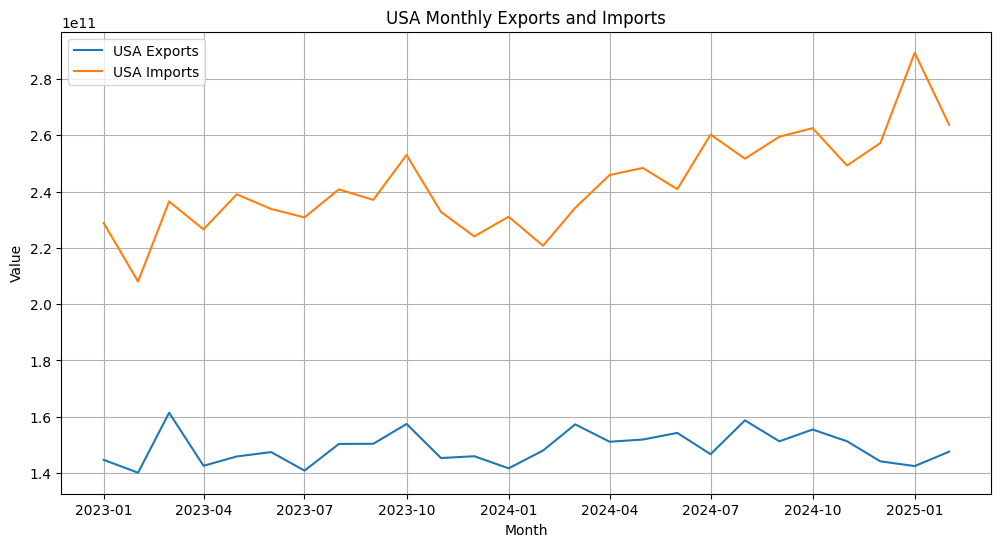

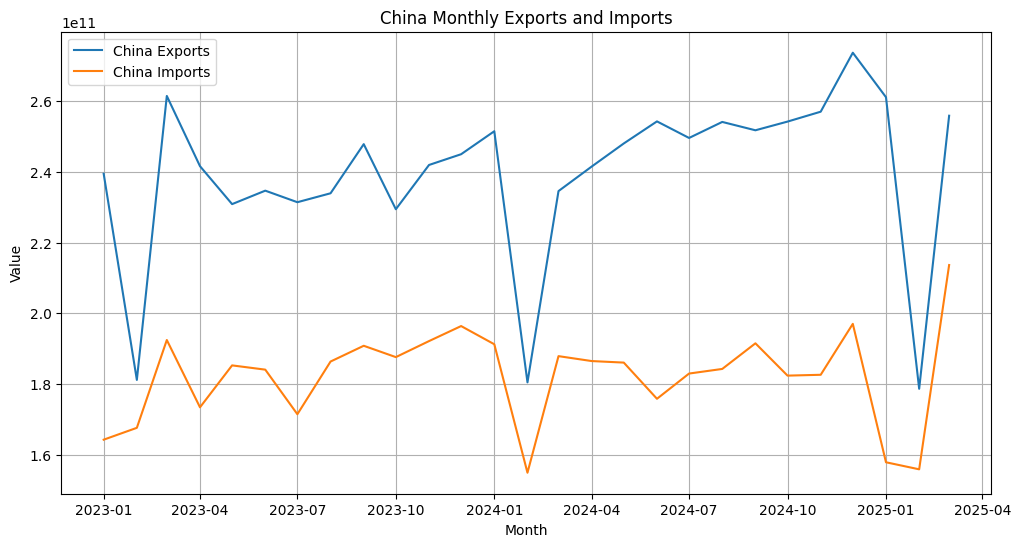

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(usa_exports['month'], usa_exports['value'], label='USA Exports')
plt.plot(usa_imports['month'], usa_imports['value'], label='USA Imports')
plt.title('USA Monthly Exports and Imports')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(chn_exports['month'], chn_exports['value'], label='China Exports')
plt.plot(chn_imports['month'], chn_imports['value'], label='China Imports')
plt.title('China Monthly Exports and Imports')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Improve plot readability

### Subtask:
Improve plot readability by adding titles, labels, and legends to the plots for clarity.


## Summary:

### Data Analysis Key Findings

* The data was successfully filtered to include only trade data for the USA and China.
* The 'month' column was successfully converted to a datetime format, enabling time-series analysis.
* The trade data was aggregated by month, origin, and trade flow, with the total value calculated for each group.
* Separate datasets were created for USA exports, USA imports, China exports, and China imports.
* Two distinct plots were generated, one showing the monthly export and import values for the USA and the other for China, over the entire duration of the dataset.
* The plots included titles, axis labels, legends, and grids for improved readability.

### Insights or Next Steps

* A visual comparison of the trade value scales between the USA and China plots could offer insights into the relative magnitude of their trade activities.
* Further analysis could involve calculating the trade balance (Exports - Imports) for each country over time and plotting this trend.


# Task
Analyze the trade data from the file "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet". First, plot the monthly exports and imports for both USA and China for the entire duration. Then, add a level 2 heading for the second part of the analysis. For this second part, explore how many hs6 or hs4 lines USA and China trade with each partner over each month. Plot two charts, one for China and one for USA, showing the number of hs6 and hs4 lines traded each month, with separate lines for hs4 imports, hs4 exports, hs6 imports, and hs6 exports.

## Add a new heading

### Subtask:
Add a level 2 markdown heading for the second part of the data analysis.


**Reasoning**:
Add a level 2 markdown heading for the second part of the analysis as requested.



In [8]:
# This is a markdown cell, it will not be executed as Python code.
# ## Analyzing the Number of Traded HS Codes

## Aggregate data for unique hs codes

### Subtask:
Group the data by month, origin, trade flow, and count the number of unique `hs6` and `hs4` codes for each group.


**Reasoning**:
Group the data by month, origin, and trade flow, and count the unique hs6 and hs4 codes for each group.



In [9]:
df_hs_counts = df.groupby(['month', 'origin', 'trade_flow']).agg(
    hs6_count=('hs6', 'nunique'),
    hs4_count=('hs4', 'nunique')
).reset_index()

display(df_hs_counts.head())

,month,origin,trade_flow,hs6_count,hs4_count
0,2023-01-01,CHN,Exports,4884,1179
1,2023-01-01,CHN,Imports,4511,1153
2,2023-01-01,USA,Exports,5176,1207
3,2023-01-01,USA,Imports,5187,1214
4,2023-02-01,CHN,Exports,4866,1184


## Prepare data for plotting

### Subtask:
Pivot the aggregated data to have separate columns for `hs4` and `hs6` counts for both imports and exports for each origin (USA and China) and month.


**Reasoning**:
Pivot the aggregated data to have separate columns for hs4 and hs6 counts for both imports and exports for each origin and month, then rename the columns for clarity and reset the index.



In [10]:
df_hs_pivot = df_hs_counts.pivot(index='month', columns=['origin', 'trade_flow'], values=['hs6_count', 'hs4_count'])

df_hs_pivot.columns = [f'{col[1]}_{col[2]}_{col[0]}' for col in df_hs_pivot.columns]

df_hs_pivot = df_hs_pivot.reset_index()

display(df_hs_pivot.head())

,month,CHN_Exports_hs6_count,CHN_Imports_hs6_count,USA_Exports_hs6_count,USA_Imports_hs6_count,CHN_Exports_hs4_count,CHN_Imports_hs4_count,USA_Exports_hs4_count,USA_Imports_hs4_count
0,2023-01-01,4884.0,4511.0,5176.0,5187.0,1179.0,1153.0,1207.0,1214.0
1,2023-02-01,4866.0,4528.0,5287.0,5283.0,1184.0,1148.0,1219.0,1220.0
2,2023-03-01,4920.0,4589.0,5347.0,5337.0,1179.0,1157.0,1222.0,1224.0
3,2023-04-01,4891.0,4577.0,5388.0,5372.0,1184.0,1154.0,1224.0,1224.0
4,2023-05-01,4889.0,4611.0,5416.0,5399.0,1188.0,1162.0,1225.0,1225.0


## Create plots

### Subtask:
Generate two plots: one for the USA and one for China, showing the monthly counts of unique `hs4` imports, `hs4` exports, `hs6` imports, and `hs6` exports.


**Reasoning**:
Generate two plots, one for USA and one for China, showing the monthly counts of unique hs4 and hs6 codes for both exports and imports.



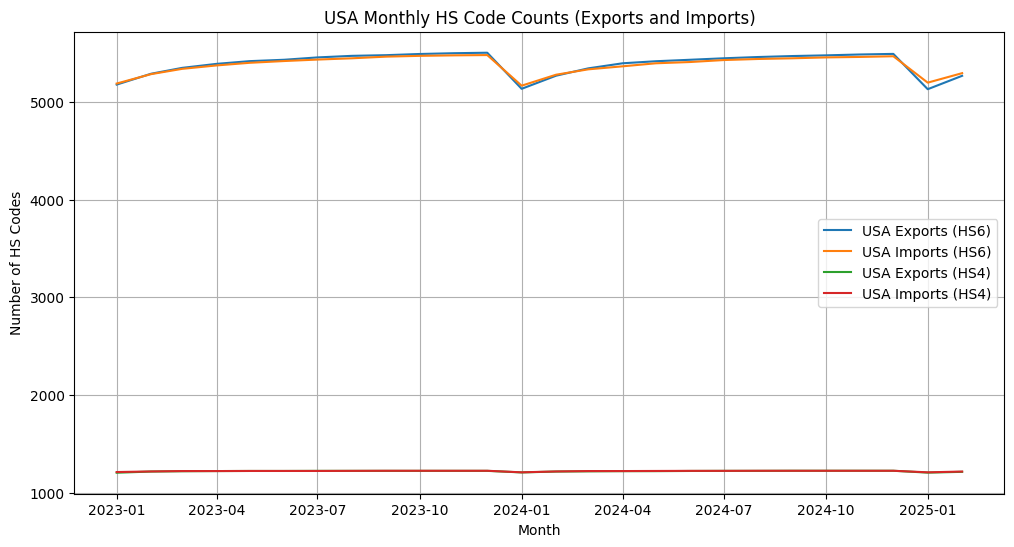

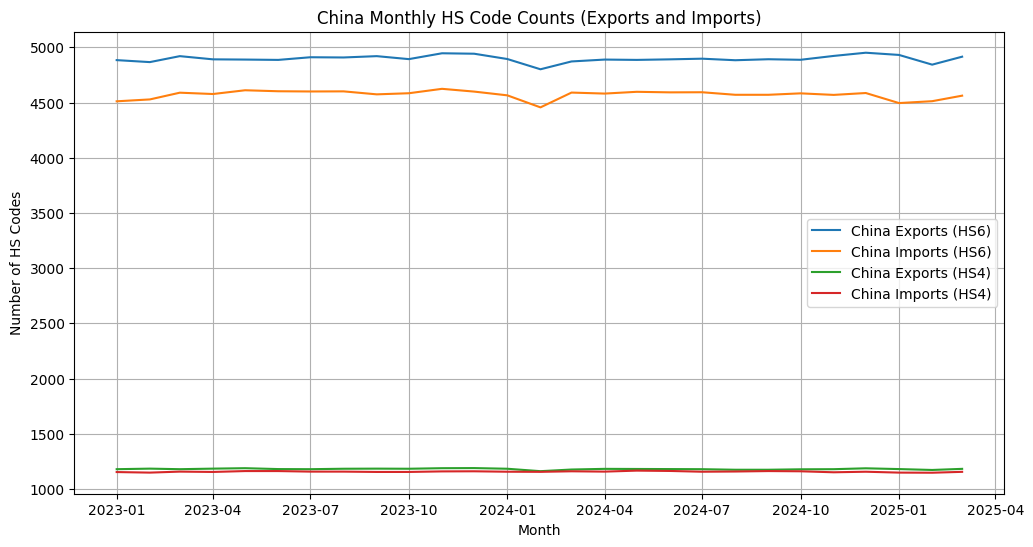

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_hs_pivot['month'], df_hs_pivot['USA_Exports_hs6_count'], label='USA Exports (HS6)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['USA_Imports_hs6_count'], label='USA Imports (HS6)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['USA_Exports_hs4_count'], label='USA Exports (HS4)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['USA_Imports_hs4_count'], label='USA Imports (HS4)')
plt.title('USA Monthly HS Code Counts (Exports and Imports)')
plt.xlabel('Month')
plt.ylabel('Number of HS Codes')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_hs_pivot['month'], df_hs_pivot['CHN_Exports_hs6_count'], label='China Exports (HS6)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['CHN_Imports_hs6_count'], label='China Imports (HS6)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['CHN_Exports_hs4_count'], label='China Exports (HS4)')
plt.plot(df_hs_pivot['month'], df_hs_pivot['CHN_Imports_hs4_count'], label='China Imports (HS4)')
plt.title('China Monthly HS Code Counts (Exports and Imports)')
plt.xlabel('Month')
plt.ylabel('Number of HS Codes')
plt.legend()
plt.grid(True)
plt.show()

## Improve plot readability

### Subtask:
Improve plot readability


## Summary:

## Data Analysis Key Findings

*   The number of unique HS6 and HS4 codes traded by both the USA and China shows monthly variations over the analyzed period.
*   For both countries, the number of unique HS6 codes traded is consistently higher than the number of unique HS4 codes traded, reflecting the more granular nature of the HS6 classification.
*   The plots show distinct patterns in the volume of traded HS codes for exports versus imports for both the USA and China.

## Insights or Next Steps

*   Analyze the specific periods with significant increases or decreases in the number of traded HS codes to understand potential underlying economic or trade policy changes.
*   Investigate which specific HS4 and HS6 codes contribute most significantly to the total trade value for each country and trade flow.


# Task
Analyze the trade data in the file "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet". First, plot the monthly exports and imports for both USA and China for the entire duration. Then, for both USA and China, plot the monthly number of unique HS4 and HS6 lines traded (exports and imports) with all partners combined. Finally, for both USA and China, identify the partner with the least number of unique HS4 lines traded (exports and imports) each month and plot this minimum count over time, annotating the partner name on the plot.

## Aggregate data by partner

### Subtask:
Group the data by month, origin, destination, and trade flow, and count the number of unique `hs4` codes for each group.


**Reasoning**:
Group the data by month, origin, destination, and trade flow, count the number of unique hs4 codes, and reset the index.



In [12]:
df_hs4_partner_counts = df.groupby(['month', 'origin', 'destination', 'trade_flow'])['hs4'].nunique().reset_index()
display(df_hs4_partner_counts.head())

,month,origin,destination,trade_flow,hs4
0,2023-01-01,CHN,AGO,Imports,10
1,2023-01-01,CHN,ARE,Exports,889
2,2023-01-01,CHN,ARE,Imports,160
3,2023-01-01,CHN,AUS,Exports,962
4,2023-01-01,CHN,AUS,Imports,474


## Find minimum hs4 count per month

### Subtask:
For each month, origin, and trade flow, find the partner with the minimum count of unique `hs4` codes.


**Reasoning**:
Group the data by month, origin, and trade flow, and find the row with the minimum 'hs4' count for each group.



In [13]:
df_min_hs4_counts = df_hs4_partner_counts.groupby(['month', 'origin', 'trade_flow']).apply(lambda x: x.nsmallest(1, 'hs4')).reset_index(drop=True)
display(df_min_hs4_counts.head())

/tmp/ipython-input-1863756009.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_min_hs4_counts = df_hs4_partner_counts.groupby(['month', 'origin', 'trade_flow']).apply(lambda x: x.nsmallest(1, 'hs4')).reset_index(drop=True)


,month,origin,destination,trade_flow,hs4
0,2023-01-01,CHN,KAZ,Exports,682
1,2023-01-01,CHN,IRQ,Imports,6
2,2023-01-01,USA,IRL,Exports,519
3,2023-01-01,USA,CHL,Imports,248
4,2023-02-01,CHN,KAZ,Exports,685


## Separate data for plotting

### Subtask:
Create separate DataFrames for USA exports, USA imports, China exports, and China imports, containing the month, the minimum hs4 count, and the partner name.


**Reasoning**:
Filter the aggregated data to create separate dataframes for USA exports, USA imports, China exports, and China imports based on the minimum hs4 counts.



In [14]:
usa_min_exports = df_min_hs4_counts[(df_min_hs4_counts['origin'] == 'USA') & (df_min_hs4_counts['trade_flow'] == 'Exports')]
usa_min_imports = df_min_hs4_counts[(df_min_hs4_counts['origin'] == 'USA') & (df_min_hs4_counts['trade_flow'] == 'Imports')]
chn_min_exports = df_min_hs4_counts[(df_min_hs4_counts['origin'] == 'CHN') & (df_min_hs4_counts['trade_flow'] == 'Exports')]
chn_min_imports = df_min_hs4_counts[(df_min_hs4_counts['origin'] == 'CHN') & (df_min_hs4_counts['trade_flow'] == 'Imports')]

display(usa_min_exports.head())
display(usa_min_imports.head())
display(chn_min_exports.head())
display(chn_min_imports.head())

,month,origin,destination,trade_flow,hs4
2,2023-01-01,USA,IRL,Exports,519
6,2023-02-01,USA,IRL,Exports,620
10,2023-03-01,USA,IRL,Exports,681
14,2023-04-01,USA,IRL,Exports,725
18,2023-05-01,USA,IRL,Exports,753


,month,origin,destination,trade_flow,hs4
3,2023-01-01,USA,CHL,Imports,248
7,2023-02-01,USA,CHL,Imports,303
11,2023-03-01,USA,CHL,Imports,335
15,2023-04-01,USA,CHL,Imports,356
19,2023-05-01,USA,CHL,Imports,387


,month,origin,destination,trade_flow,hs4
0,2023-01-01,CHN,KAZ,Exports,682
4,2023-02-01,CHN,KAZ,Exports,685
8,2023-03-01,CHN,KAZ,Exports,690
12,2023-04-01,CHN,KAZ,Exports,704
16,2023-05-01,CHN,KAZ,Exports,705


,month,origin,destination,trade_flow,hs4
1,2023-01-01,CHN,IRQ,Imports,6
5,2023-02-01,CHN,IRQ,Imports,8
9,2023-03-01,CHN,AGO,Imports,13
13,2023-04-01,CHN,AGO,Imports,11
17,2023-05-01,CHN,AGO,Imports,15


## Create plots

### Subtask:
Generate four plots: one for USA exports, one for USA imports, one for China exports, and one for China imports, showing the monthly minimum hs4 count and annotating the partner name on the plot.


**Reasoning**:
Generate the four plots for USA exports, USA imports, China exports, and China imports, showing the monthly minimum hs4 count and annotating the partner name on each plot.



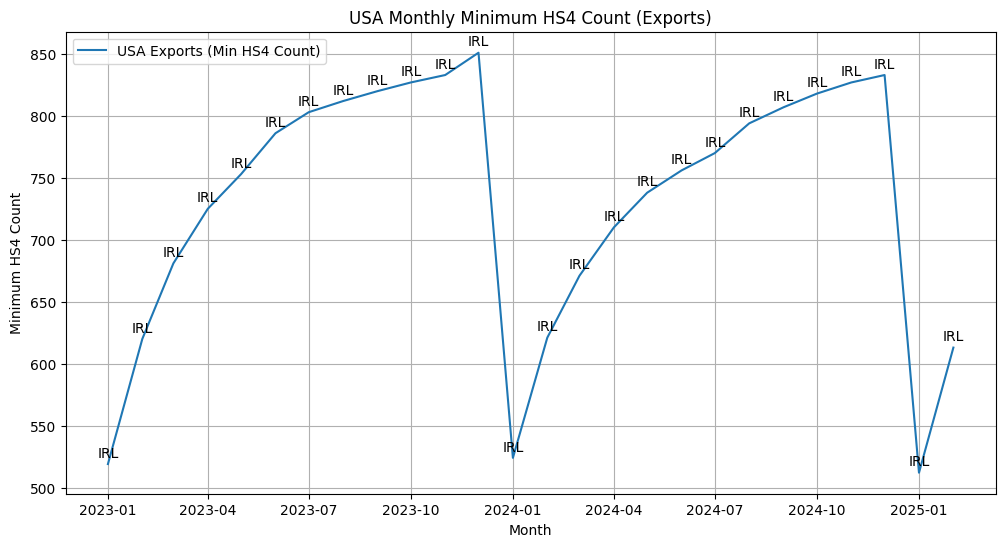

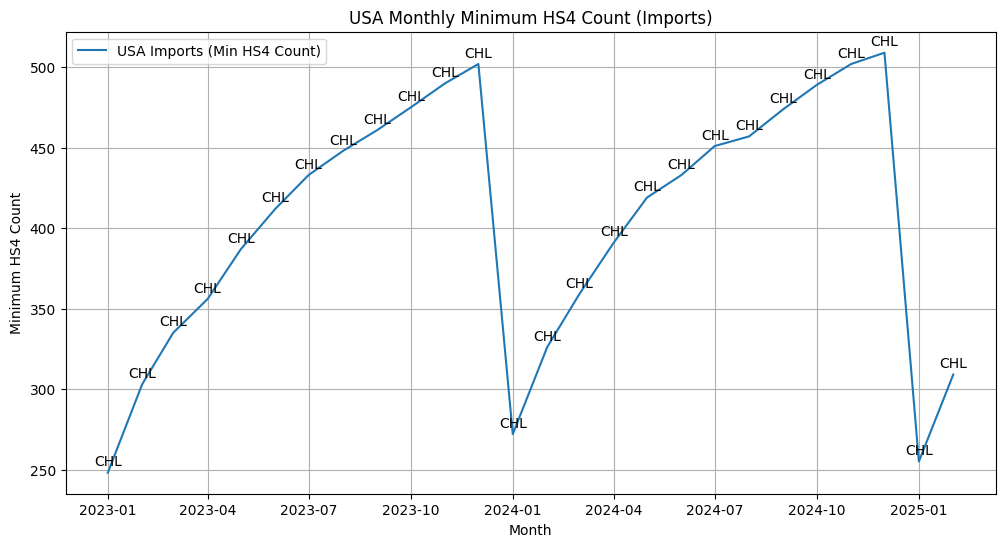

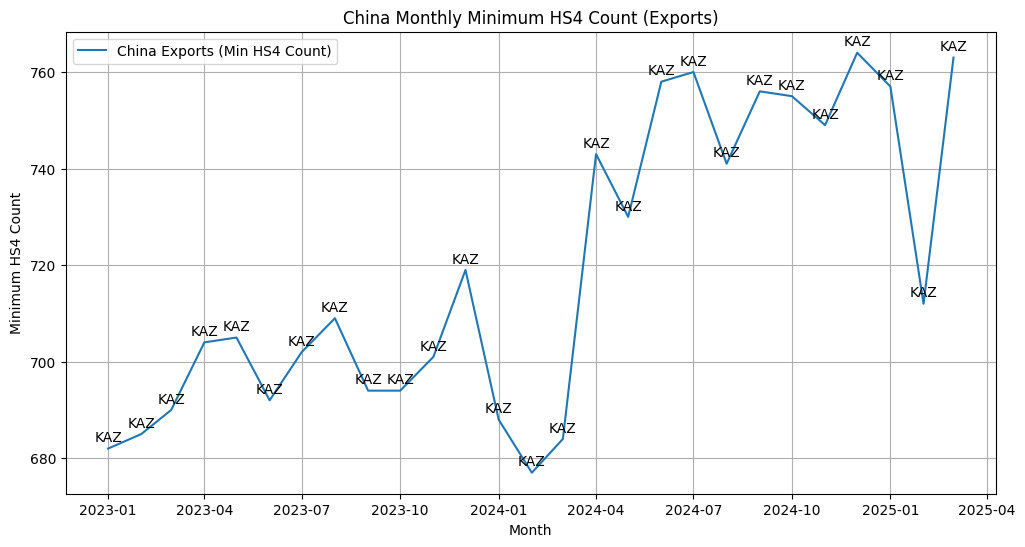

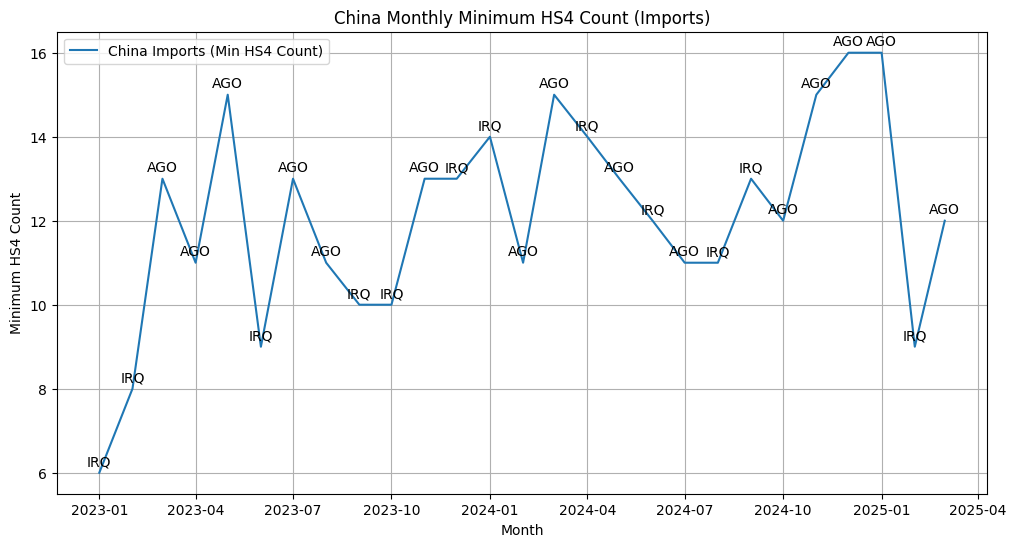

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(usa_min_exports['month'], usa_min_exports['hs4'], label='USA Exports (Min HS4 Count)')
plt.title('USA Monthly Minimum HS4 Count (Exports)')
plt.xlabel('Month')
plt.ylabel('Minimum HS4 Count')
plt.legend()
plt.grid(True)
for index, row in usa_min_exports.iterrows():
    plt.annotate(row['destination'], (row['month'], row['hs4']), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(usa_min_imports['month'], usa_min_imports['hs4'], label='USA Imports (Min HS4 Count)')
plt.title('USA Monthly Minimum HS4 Count (Imports)')
plt.xlabel('Month')
plt.ylabel('Minimum HS4 Count')
plt.legend()
plt.grid(True)
for index, row in usa_min_imports.iterrows():
    plt.annotate(row['destination'], (row['month'], row['hs4']), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(chn_min_exports['month'], chn_min_exports['hs4'], label='China Exports (Min HS4 Count)')
plt.title('China Monthly Minimum HS4 Count (Exports)')
plt.xlabel('Month')
plt.ylabel('Minimum HS4 Count')
plt.legend()
plt.grid(True)
for index, row in chn_min_exports.iterrows():
    plt.annotate(row['destination'], (row['month'], row['hs4']), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(chn_min_imports['month'], chn_min_imports['hs4'], label='China Imports (Min HS4 Count)')
plt.title('China Monthly Minimum HS4 Count (Imports)')
plt.xlabel('Month')
plt.ylabel('Minimum HS4 Count')
plt.legend()
plt.grid(True)
for index, row in chn_min_imports.iterrows():
    plt.annotate(row['destination'], (row['month'], row['hs4']), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

# Task
Analyze the trade data from the "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet" file. First, plot the monthly exports and imports for both the USA and China over the entire duration. Then, for both the USA and China, plot the monthly number of unique HS4 and HS6 lines traded (imports and exports) with all partners. Finally, identify and plot the partner with the minimum monthly unique HS4 exports and imports for the USA and China separately, showing the partner name and the corresponding HS4 count for each month. Additionally, count and plot the number of countries that exported less than 200 unique HS4 codes to China each month.

## Filter data for china imports

### Subtask:
Filter the `df_hs4_partner_counts` DataFrame to include only China imports.


**Reasoning**:
Filter the `df_hs4_partner_counts` DataFrame to include only China imports and store the result in a new DataFrame called `chn_imports_hs4_partner`, then display the head of the new DataFrame.



In [16]:
chn_imports_hs4_partner = df_hs4_partner_counts[(df_hs4_partner_counts['origin'] == 'CHN') & (df_hs4_partner_counts['trade_flow'] == 'Imports')]
display(chn_imports_hs4_partner.head())

,month,origin,destination,trade_flow,hs4
0,2023-01-01,CHN,AGO,Imports,10
2,2023-01-01,CHN,ARE,Imports,160
4,2023-01-01,CHN,AUS,Imports,474
8,2023-01-01,CHN,BRA,Imports,357
10,2023-01-01,CHN,CAN,Imports,525


## Filter for less than 200 hs4

### Subtask:
Filter the China imports data to include only rows where the `hs4` count is less than 200.


**Reasoning**:
Filter the China imports data to include only rows where the hs4 count is less than 200 and display the head of the filtered DataFrame.



In [17]:
chn_imports_less_than_200_hs4 = chn_imports_hs4_partner[chn_imports_hs4_partner['hs4'] < 200]
display(chn_imports_less_than_200_hs4.head())

,month,origin,destination,trade_flow,hs4
0,2023-01-01,CHN,AGO,Imports,10
2,2023-01-01,CHN,ARE,Imports,160
12,2023-01-01,CHN,CHL,Imports,110
25,2023-01-01,CHN,IRQ,Imports,6
38,2023-01-01,CHN,OMN,Imports,44


## Count countries per month

### Subtask:
Group the filtered data by month and count the number of unique destination countries for each month.


**Reasoning**:
Group the data by month and count the unique destination countries for each month, then rename the columns.



In [18]:
chn_imports_country_count = chn_imports_less_than_200_hs4.groupby('month')['destination'].nunique().reset_index()
chn_imports_country_count.columns = ['month', 'country_count']
display(chn_imports_country_count.head())

,month,country_count
0,2023-01-01,8
1,2023-02-01,7
2,2023-03-01,8
3,2023-04-01,7
4,2023-05-01,7


## Create plot

### Subtask:
Generate a plot showing the monthly count of countries that exported less than 200 unique HS4 codes to China.


**Reasoning**:
Generate a plot showing the monthly count of countries that exported less than 200 unique HS4 codes to China with appropriate labels and title.



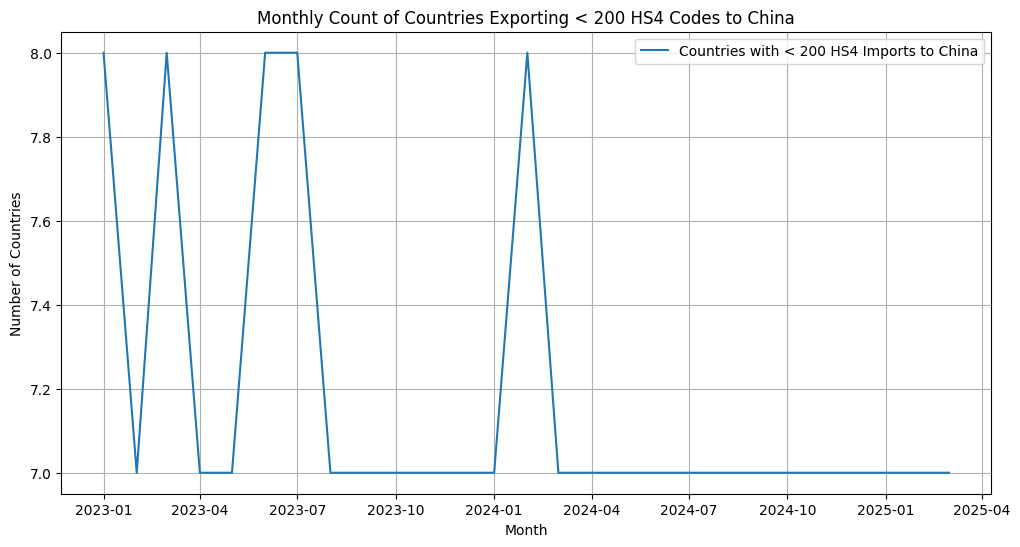

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(chn_imports_country_count['month'], chn_imports_country_count['country_count'], label='Countries with < 200 HS4 Imports to China')
plt.title('Monthly Count of Countries Exporting < 200 HS4 Codes to China')
plt.xlabel('Month')
plt.ylabel('Number of Countries')
plt.legend()
plt.grid(True)
plt.show()

## Improve plot readability

### Subtask:
Improve plot readability


## Summary:

### Data Analysis Key Findings

*   The number of countries exporting less than 200 unique HS4 codes to China each month fluctuates over the analyzed period.
*   The plot shows a general trend and variation in the count of these countries month by month.

### Insights or Next Steps

*   Further analysis could investigate which specific countries consistently export less than 200 unique HS4 codes to China and explore potential reasons for this limited trade diversity.
*   Investigating the types of HS4 codes that make up these less diversified export baskets could provide insights into the nature of trade relationships with these countries.


# Task
Analyze the trade data to identify countries that consistently export less than 200 unique HS4 codes to China each month, determine if these countries are the same over time, and identify their top 3 HS4 level exports to China.

## Identify the countries with less than 200 hs4 imports to china each month

### Subtask:
Extract the list of countries from `chn_imports_less_than_200_hs4` for each month.


**Reasoning**:
Group the filtered China imports data by month and extract the unique destination countries for each month.



In [20]:
monthly_countries_less_than_200 = chn_imports_less_than_200_hs4.groupby('month')['destination'].unique()
display(monthly_countries_less_than_200)

,destination
month,
2023-01-01,"[AGO, ARE, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-02-01,"[AGO, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-03-01,"[AGO, ARE, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-04-01,"[AGO, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-05-01,"[AGO, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-06-01,"[AGO, ARE, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-07-01,"[AGO, ARE, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-08-01,"[AGO, CHL, IRQ, OMN, PER, QAT, SAU]"
2023-09-01,"[AGO, CHL, IRQ, OMN, PER, QAT, SAU]"


## Analyze consistency of countries

### Subtask:
Determine if the set of countries with less than 200 HS4 imports to China is the same across all months.


**Reasoning**:
Convert the arrays of countries in the `monthly_countries_less_than_200` series to sets and compare them to check for consistency.



In [21]:
monthly_countries_sets = monthly_countries_less_than_200.apply(set)

is_same_set = True
changing_months = []

for i in range(len(monthly_countries_sets) - 1):
    if monthly_countries_sets.iloc[i] != monthly_countries_sets.iloc[i+1]:
        is_same_set = False
        changing_months.append(monthly_countries_sets.index[i+1])

if is_same_set:
    print("The set of countries with less than 200 HS4 imports to China is the same across all months.")
else:
    print("The set of countries with less than 200 HS4 imports to China changes over time.")
    print("Months where the set of countries changes:", changing_months)

The set of countries with less than 200 HS4 imports to China changes over time.
Months where the set of countries changes: [Timestamp('2023-02-01 00:00:00'), Timestamp('2023-03-01 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-06-01 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-01 00:00:00')]


## Filter original data for identified countries and china imports

### Subtask:
Filter the original `df` DataFrame to include only China imports from the countries identified in the previous step.


**Reasoning**:
Filter the original DataFrame to include only China imports from the identified countries.



In [22]:
unique_countries = chn_imports_less_than_200_hs4['destination'].unique()
df_filtered_china_imports = df[(df['origin'] == 'CHN') & (df['trade_flow'] == 'Imports') & (df['destination'].isin(unique_countries))]
display(df_filtered_china_imports.head())

,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098


## Group by month, destination, and hs4 and sum values

### Subtask:
Group the filtered data by month, destination, and hs4 and sum values


**Reasoning**:
Group the filtered data by month, destination, and hs4 and sum values as requested in the instructions.



In [23]:
df_hs4_value_sum = df_filtered_china_imports.groupby(['month', 'destination', 'hs4'])['value'].sum().reset_index()
display(df_hs4_value_sum.head())

,month,destination,hs4,value
0,2023-01-01,AGO,2506,94695
1,2023-01-01,AGO,2516,3693105
2,2023-01-01,AGO,2709,1539349098
3,2023-01-01,AGO,2711,31143791
4,2023-01-01,AGO,4403,193536


**Reasoning**:
For each month and destination, find the top 3 hs4 codes based on the sum of values and reset the index.



In [24]:
df_top3_hs4 = df_hs4_value_sum.groupby(['month', 'destination']).apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)
display(df_top3_hs4.head())

/tmp/ipython-input-3809208835.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3_hs4 = df_hs4_value_sum.groupby(['month', 'destination']).apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)


,month,destination,hs4,value
0,2023-01-01,AGO,2709,1539349098
1,2023-01-01,AGO,2711,31143791
2,2023-01-01,AGO,2516,3693105
3,2023-01-01,ARE,2709,2242832368
4,2023-01-01,ARE,2711,405590127


## Display the top exports

### Subtask:
Present the identified countries and their top 3 HS4 exports to China for each month.


**Reasoning**:
Iterate through each month and present the top 3 HS4 exports for each country in that month.



In [25]:
for month in df_top3_hs4['month'].unique():
    print(f"Month: {month.strftime('%Y-%m-%d')}")
    monthly_data = df_top3_hs4[df_top3_hs4['month'] == month]
    for destination in monthly_data['destination'].unique():
        print(f"  Country: {destination}")
        country_data = monthly_data[monthly_data['destination'] == destination]
        for index, row in country_data.iterrows():
            print(f"    HS4: {row['hs4']}, Value: {row['value']}")
    print("-" * 20)

Month: 2023-01-01
  Country: AGO
    HS4: 2709, Value: 1539349098
    HS4: 2711, Value: 31143791
    HS4: 2516, Value: 3693105
  Country: ARE
    HS4: 2709, Value: 2242832368
    HS4: 2711, Value: 405590127
    HS4: 2710, Value: 164872412
  Country: CHL
    HS4: 0809, Value: 1653942690
    HS4: 2603, Value: 1553511208
    HS4: 2836, Value: 684220901
  Country: IRQ
    HS4: 2709, Value: 2634152971
    HS4: 2713, Value: 128409
    HS4: 3824, Value: 33488
  Country: OMN
    HS4: 2709, Value: 1611473784
    HS4: 2711, Value: 411525780
    HS4: 2905, Value: 86893487
  Country: PER
    HS4: 2603, Value: 1285961674
    HS4: 7403, Value: 196210641
    HS4: 2601, Value: 185086529
  Country: QAT
    HS4: 2711, Value: 1416065840
    HS4: 2709, Value: 640089288
    HS4: 2710, Value: 82998004
  Country: SAU
    HS4: 2709, Value: 4981464576
    HS4: 3901, Value: 205701444
    HS4: 2905, Value: 170926064
--------------------
Month: 2023-02-01
  Country: AGO
    HS4: 2709, Value: 1105965457
    HS4: 2

## Summary:

### Data Analysis Key Findings

*   The set of countries exporting less than 200 unique HS4 codes to China is not consistent across all months, changing in February 2023, March 2023, April 2023, June 2023, August 2023, February 2024, and March 2024.
*   The analysis successfully identified and presented the top 3 HS4 export codes and their values for each of the identified countries to China on a monthly basis.

### Insights or Next Steps

*   Investigate the reasons behind the monthly changes in the set of countries exporting less than 200 unique HS4 codes to China.
*   Analyze the specific HS4 codes that appear in the top 3 exports for consistency across months and countries to identify key low-diversity export categories.


# Task
Analyze trade data from the file "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet" by performing the following steps:

1. Plot monthly exports and imports for both USA and China for the entire duration.
2. For both USA and China, plot the monthly number of unique HS4 and HS6 lines traded (imports and exports) with all partners.
3. For both USA and China, identify the partner country with the least number of unique HS4 lines traded (exports and imports) each month and plot this minimum count along with the partner's name.
4. For China's imports, identify the number of countries that consistently sent less than 200 unique HS4 lines each month.
5. For the countries identified in step 4, list their names and determine if they are the same across the time period. Also, identify their top 3 HS4 level exports to China over the entire duration.
6. Rank China's import partner countries based on the total trade value during the entire duration.

## Filter data for china imports

### Subtask:
Filter the original DataFrame to include only China's import data.


**Reasoning**:
Filter the original DataFrame to include only China imports and display the head of the filtered DataFrame.



In [26]:
df_china_imports = df[(df['origin'] == 'CHN') & (df['trade_flow'] == 'Imports')]
display(df_china_imports.head())

,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098


## Aggregate trade value by partner

### Subtask:
Group the filtered data by 'destination' (partner country) and sum the 'value' to get the total import value from each partner.


**Reasoning**:
Group the filtered China imports data by destination and sum the value to get the total import value for each partner, then reset the index and display the head.



In [27]:
df_china_partner_trade_value = df_china_imports.groupby('destination')['value'].sum().reset_index()
display(df_china_partner_trade_value.head())

,destination,value
0,AGO,41721683607
1,ARE,84768167714
2,AUS,326234348432
3,BRA,260209388842
4,CAN,104788112281


## Rank partners

### Subtask:
Rank the partner countries based on the aggregated total import value in descending order.


**Reasoning**:
Sort the DataFrame by value in descending order, add a rank column, and display the result.



In [28]:
df_china_partner_trade_value_ranked = df_china_partner_trade_value.sort_values(by='value', ascending=False).reset_index(drop=True)
df_china_partner_trade_value_ranked['rank'] = df_china_partner_trade_value_ranked.index + 1
display(df_china_partner_trade_value_ranked.head())

,destination,value,rank
0,TWN,471520149014,1
1,KOR,386577565620,2
2,USA,372006778807,3
3,JPN,353807874324,4
4,AUS,326234348432,5


## Display ranked partners

### Subtask:
Display the ranked list of China's import partners and their total import values.


**Reasoning**:
Print the entire df_china_partner_trade_value_ranked DataFrame to display the ranked list of China's import partners and their corresponding total import values.



In [30]:
def highlight_countries(row):
    countries_less_than_200_set = set(chn_imports_less_than_200_hs4['destination'].unique())
    color = 'red' if row['destination'] in countries_less_than_200_set else ''
    return [f'color: {color}'] * len(row)

display(df_china_partner_trade_value_ranked.style.apply(highlight_countries, axis=1))

,destination,value,rank
0,TWN,471520149014,1
1,KOR,386577565620,2
2,USA,372006778807,3
3,JPN,353807874324,4
4,AUS,326234348432,5
5,RUS,288615940722,6
6,BRA,260209388842,7
7,CHN,250813864372,8
8,MYS,240545541452,9
9,DEU,223901938265,10


## Summary:

### Data Analysis Key Findings

*   Taiwan (TWN) is the top-ranked import partner for China based on total trade value over the entire duration, followed by South Korea (KOR) and the United States (USA).

### Insights or Next Steps

*   The analysis of trade value ranking provides a clear picture of China's most significant import partners. Further analysis could delve into the types of goods imported from these top partners.
